# 산탄데르 은행 고객 만족도
- 데이터 전처리

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [6]:
!curl -L https://bit.ly/2MVNMaK -o train_santander.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   148  100   148    0     0     44      0  0:00:03  0:00:03 --:--:--    44
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 56.6M  100 56.6M    0     0   829k      0  0:01:09  0:01:09 --:--:-- 1094k12k      0  0:03:05  0:00:21  0:02:44  490k0:00:49  0:00:29 1155k0:01:15  0:00:55  0:00:20 1060k 0:00:01  957k


In [7]:
cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)

dataset shape: (76020, 371)


In [9]:
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


- 271 개의 컬럼이 있다
- 불만족도(1)의 비율을 보겠다

In [10]:
print(cust_df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


In [11]:
(cust_df['TARGET'] == 1).mean().round(5)

0.03957

In [12]:
cust_df.shape

(76020, 371)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 50 Text xticklabel objects>)

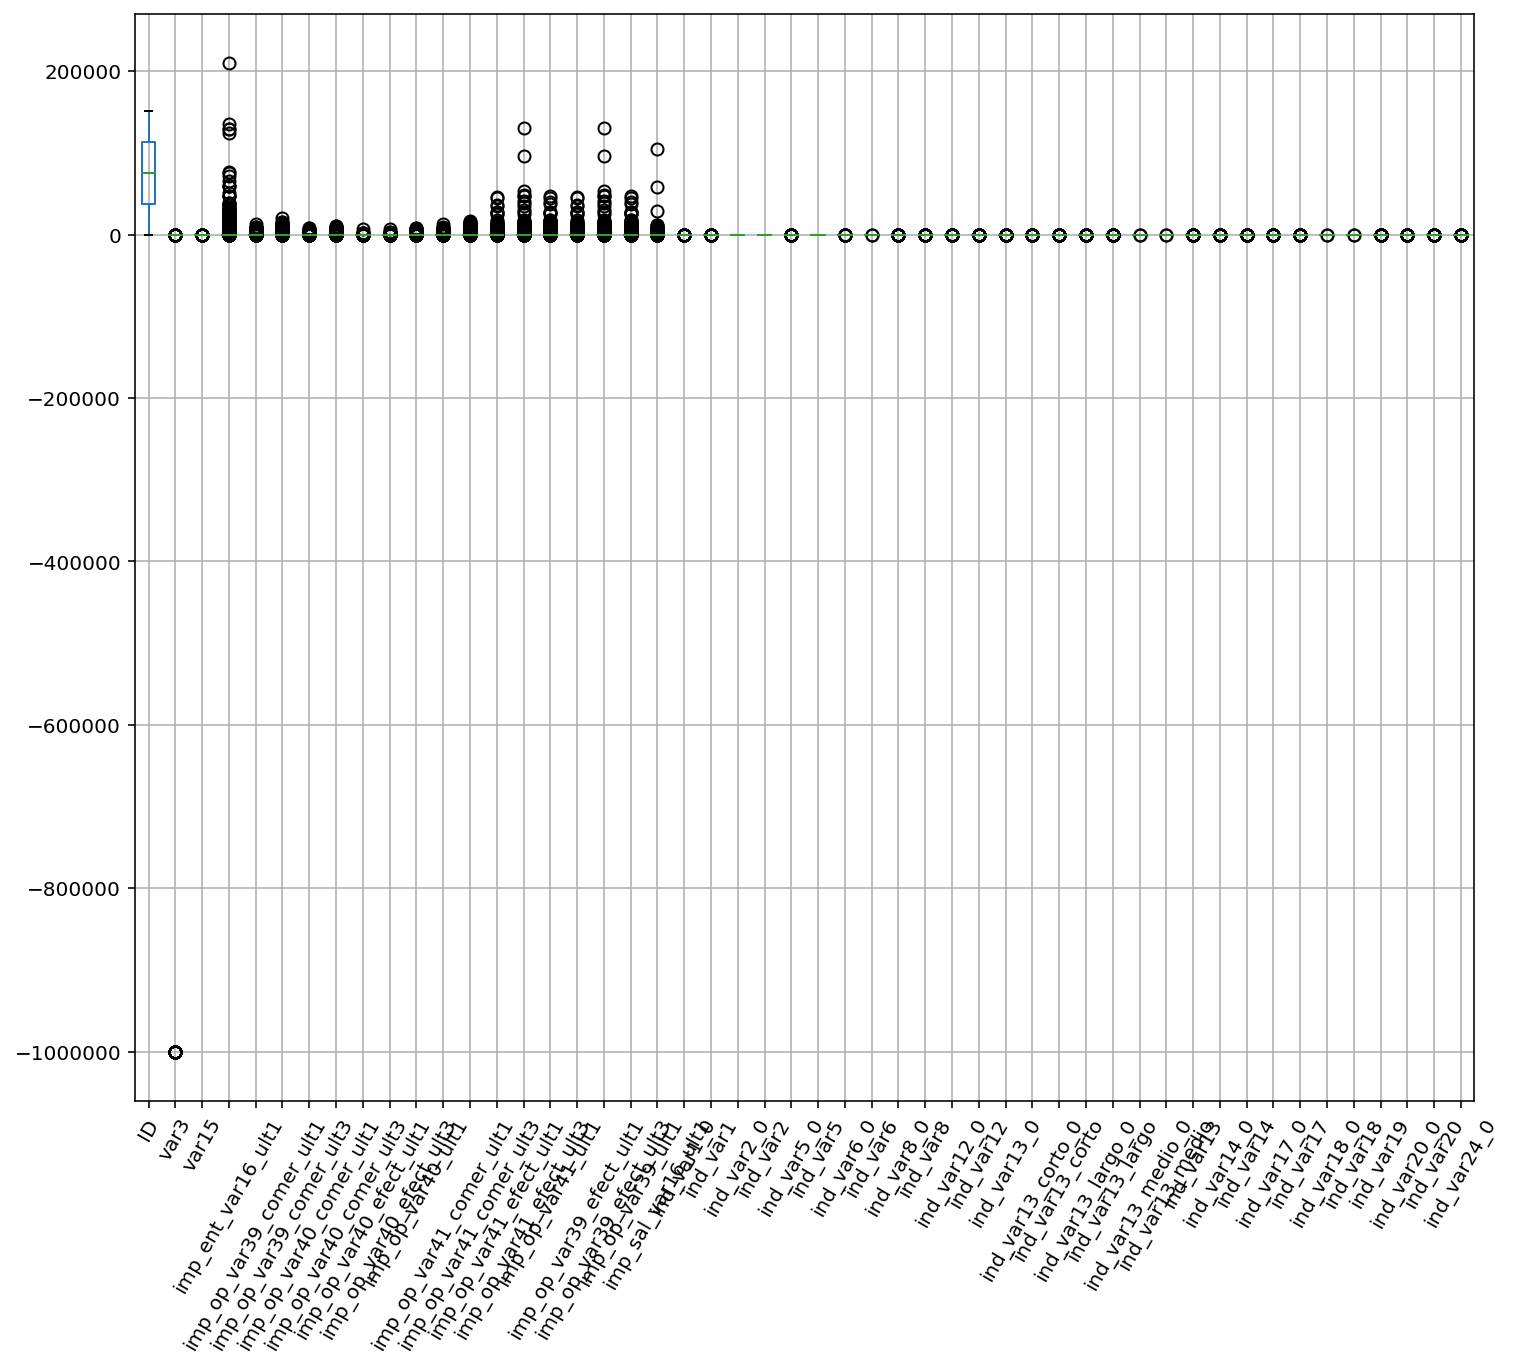

In [13]:
plt.figure(figsize=(12,10))
cust_df.iloc[:,0:50].boxplot()
plt.xticks(rotation = 60)

In [14]:
(cust_df['var3'] == -999999).sum()

116

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 <a list of 20 Text xticklabel objects>)

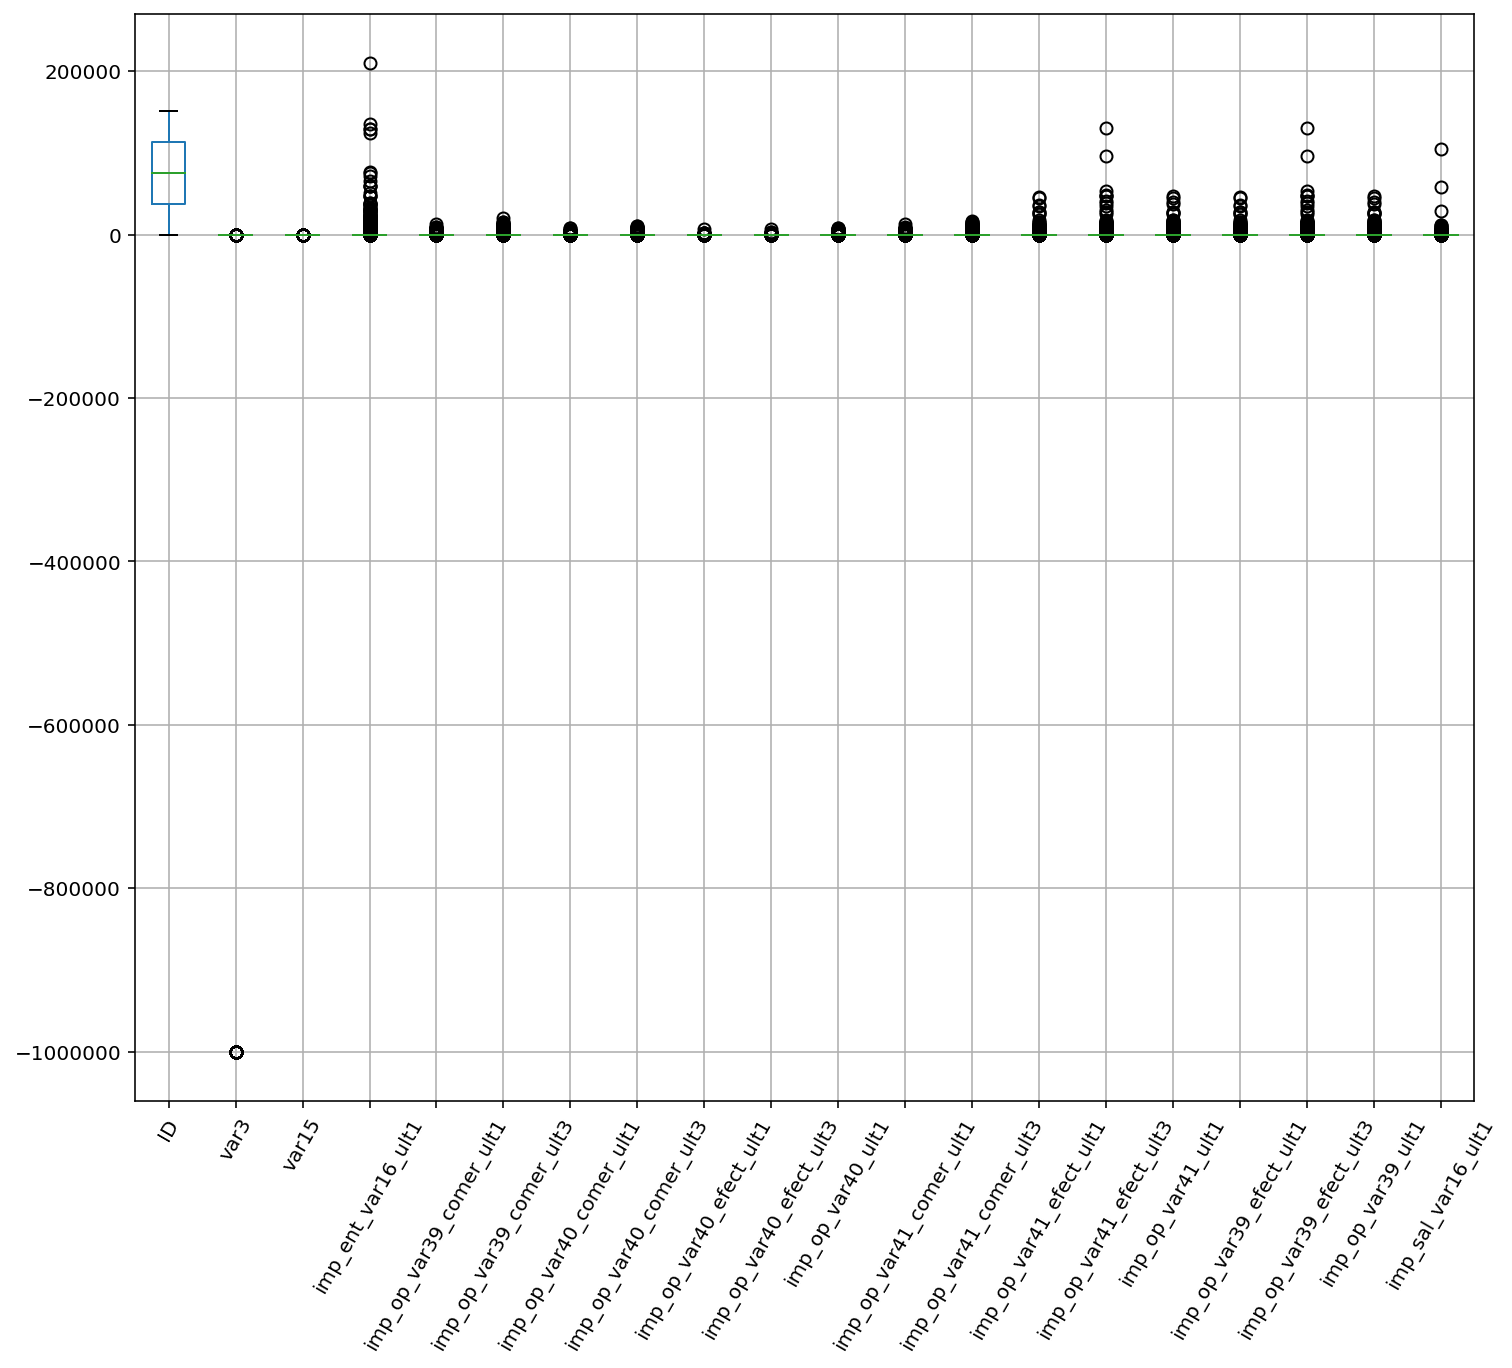

In [15]:
plt.figure(figsize=(12,10))
cust_df.iloc[:,0:20].boxplot()
plt.xticks(rotation = 60)

In [16]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [17]:
cust_df['var3'].replace(-999999,2, inplace=True)

In [18]:
# var3 피처 값 대체 및 ID 삭제
cust_df.drop('ID',axis=1, inplace=True)

# 특성 컬럼과 레이블 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
X_features.shape

(76020, 369)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=9)
print('훈련데이터, 검증데이터: ', X_train.shape , X_test.shape)
print('훈련데이터 레이블 비율',(y_train == 1).mean())
print('검증데이터 레이블 비율',(y_test == 1).mean())


훈련데이터, 검증데이터:  (60816, 369) (15204, 369)
훈련데이터 레이블 비율 0.0394468560905025
검증데이터 레이블 비율 0.04005524861878453


## 랜덤 포레스트 사용

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
score = clf.predict_proba(X_test)[:,1]

In [37]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('AUC=', roc_auc_score(y_test, score))

[[14462   133]
 [  570    39]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14595
           1       0.23      0.06      0.10       609

    accuracy                           0.95     15204
   macro avg       0.59      0.53      0.54     15204
weighted avg       0.93      0.95      0.94     15204

AUC= 0.7140108602772952


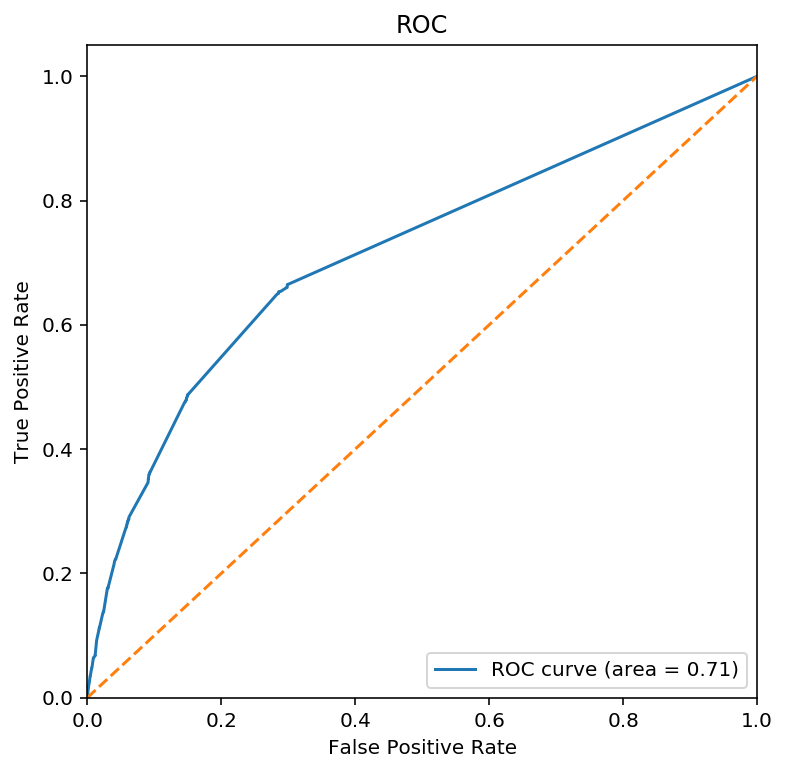

In [38]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, score)
roc_auc = roc_auc_score(y_test, score)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

In [39]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=500, random_state=9)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.803926	validation_1-auc:0.795206
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.810162	validation_1-auc:0.801639
[2]	validation_0-auc:0.810519	validation_1-auc:0.801985
[3]	validation_0-auc:0.814872	validation_1-auc:0.80637
[4]	validation_0-auc:0.813405	validation_1-auc:0.802863
[5]	validation_0-auc:0.818567	validation_1-auc:0.809772
[6]	validation_0-auc:0.818858	validation_1-auc:0.81221
[7]	validation_0-auc:0.818528	validation_1-auc:0.811828
[8]	validation_0-auc:0.818391	validation_1-auc:0.811437
[9]	validation_0-auc:0.818541	validation_1-auc:0.811623
[10]	validation_0-auc:0.819047	validation_1-auc:0.811723
[11]	validation_0-auc:0.819601	validation_1-auc:0.812049
[12]	validation_0-auc:0.819505	validation_1-auc:0.811999
[13]	validation_0-auc:0.819584	validation_1-auc:0.811941
[14]	validation_0-auc:0.819879	validation_1-auc:0.812365

[141]	validation_0-auc:0.862971	validation_1-auc:0.834831
[142]	validation_0-auc:0.863059	validation_1-auc:0.834928
[143]	validation_0-auc:0.863218	validation_1-auc:0.834923
[144]	validation_0-auc:0.863378	validation_1-auc:0.835037
[145]	validation_0-auc:0.863624	validation_1-auc:0.835073
[146]	validation_0-auc:0.863881	validation_1-auc:0.834945
[147]	validation_0-auc:0.863907	validation_1-auc:0.83499
[148]	validation_0-auc:0.863957	validation_1-auc:0.835015
[149]	validation_0-auc:0.864018	validation_1-auc:0.835033
[150]	validation_0-auc:0.864055	validation_1-auc:0.83505
[151]	validation_0-auc:0.864121	validation_1-auc:0.835013
[152]	validation_0-auc:0.864251	validation_1-auc:0.835027
[153]	validation_0-auc:0.86428	validation_1-auc:0.834995
[154]	validation_0-auc:0.864416	validation_1-auc:0.835138
[155]	validation_0-auc:0.864594	validation_1-auc:0.835185
[156]	validation_0-auc:0.864866	validation_1-auc:0.835109
[157]	validation_0-auc:0.865039	validation_1-auc:0.835017
[158]	validation_

[283]	validation_0-auc:0.875675	validation_1-auc:0.836033
[284]	validation_0-auc:0.875745	validation_1-auc:0.836098
[285]	validation_0-auc:0.875743	validation_1-auc:0.836117
[286]	validation_0-auc:0.875883	validation_1-auc:0.836075
[287]	validation_0-auc:0.875933	validation_1-auc:0.836031
[288]	validation_0-auc:0.876067	validation_1-auc:0.836008
[289]	validation_0-auc:0.87628	validation_1-auc:0.835909
[290]	validation_0-auc:0.876303	validation_1-auc:0.835943
[291]	validation_0-auc:0.876349	validation_1-auc:0.835968
[292]	validation_0-auc:0.876374	validation_1-auc:0.835948
[293]	validation_0-auc:0.87642	validation_1-auc:0.835952
[294]	validation_0-auc:0.876458	validation_1-auc:0.83598
[295]	validation_0-auc:0.876628	validation_1-auc:0.836024
[296]	validation_0-auc:0.876638	validation_1-auc:0.836051
[297]	validation_0-auc:0.876703	validation_1-auc:0.836
[298]	validation_0-auc:0.876764	validation_1-auc:0.836037
[299]	validation_0-auc:0.876786	validation_1-auc:0.836016
[300]	validation_0-a

In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.803125	validation_1-auc:0.802563
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.812106	validation_1-auc:0.809871
[2]	validation_0-auc:0.800827	validation_1-auc:0.803884
[3]	validation_0-auc:0.81741	validation_1-auc:0.818242
[4]	validation_0-auc:0.809135	validation_1-auc:0.813688
[5]	validation_0-auc:0.816184	validation_1-auc:0.822033
[6]	validation_0-auc:0.829038	validation_1-auc:0.829229
[7]	validation_0-auc:0.818428	validation_1-auc:0.820598
[8]	validation_0-auc:0.82484	validation_1-auc:0.825886
[9]	validation_0-auc:0.828268	validation_1-auc:0.827756
[10]	validation_0-auc:0.828564	validation_1-auc:0.826696
[11]	validation_0-auc:0.826549	validation_1-auc:0.823761
[12]	validation_0-auc:0.825155	validation_1-auc:0.822388
[13]	validation_0-auc:0.821696	validation_1-auc:0.820635
[14]	validation_0-auc:0.82695	validation_1-auc:0.82465
[1

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.805518	validation_1-auc:0.800757
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.815804	validation_1-auc:0.812139
[2]	validation_0-auc:0.814427	validation_1-auc:0.81635
[3]	validation_0-auc:0.823999	validation_1-auc:0.821895
[4]	validation_0-auc:0.8179	validation_1-auc:0.819242
[5]	validation_0-auc:0.826206	validation_1-auc:0.827842
[6]	validation_0-auc:0.831136	validation_1-auc:0.830269
[7]	validation_0-auc:0.824936	validation_1-auc:0.82443
[8]	validation_0-auc:0.831083	validation_1-auc:0.830063
[9]	validation_0-auc:0.832439	validation_1-auc:0.831145
[10]	validation_0-auc:0.831981	validation_1-auc:0.829478
[11]	validation_0-auc:0.831434	validation_1-auc:0.828269
[12]	validation_0-auc:0.830621	validation_1-auc:0.827024
[13]	validation_0-auc:0.828258	validation_1-auc:0.825792
[14]	validation_0-auc:0.833664	validation_1-auc:0.829535
[1

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.813699	validation_1-auc:0.811743
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.824862	validation_1-auc:0.82533
[2]	validation_0-auc:0.827045	validation_1-auc:0.827682
[3]	validation_0-auc:0.82964	validation_1-auc:0.829265
[4]	validation_0-auc:0.824336	validation_1-auc:0.826156
[5]	validation_0-auc:0.830095	validation_1-auc:0.831576
[6]	validation_0-auc:0.833528	validation_1-auc:0.833321
[7]	validation_0-auc:0.832148	validation_1-auc:0.83166
[8]	validation_0-auc:0.833195	validation_1-auc:0.831405
[9]	validation_0-auc:0.835167	validation_1-auc:0.83153
[10]	validation_0-auc:0.835924	validation_1-auc:0.83093
[11]	validation_0-auc:0.836035	validation_1-auc:0.829957
[12]	validation_0-auc:0.83408	validation_1-auc:0.827925
[13]	validation_0-auc:0.831557	validation_1-auc:0.825486
[14]	validation_0-auc:0.835516	validation_1-auc:0.82985
[15]	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.802666	validation_1-auc:0.80308
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.810959	validation_1-auc:0.80954
[2]	validation_0-auc:0.800738	validation_1-auc:0.806393
[3]	validation_0-auc:0.816646	validation_1-auc:0.81909
[4]	validation_0-auc:0.808246	validation_1-auc:0.814372
[5]	validation_0-auc:0.81438	validation_1-auc:0.822312
[6]	validation_0-auc:0.827843	validation_1-auc:0.829959
[7]	validation_0-auc:0.819179	validation_1-auc:0.822757
[8]	validation_0-auc:0.826382	validation_1-auc:0.828207
[9]	validation_0-auc:0.829586	validation_1-auc:0.828729
[10]	validation_0-auc:0.829222	validation_1-auc:0.827035
[11]	validation_0-auc:0.827852	validation_1-auc:0.825739
[12]	validation_0-auc:0.826456	validation_1-auc:0.824152
[13]	validation_0-auc:0.824016	validation_1-auc:0.822555
[14]	validation_0-auc:0.828589	validation_1-auc:0.826462
[1

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.80788	validation_1-auc:0.804066
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816499	validation_1-auc:0.813287
[2]	validation_0-auc:0.811867	validation_1-auc:0.814203
[3]	validation_0-auc:0.825449	validation_1-auc:0.822801
[4]	validation_0-auc:0.819254	validation_1-auc:0.81954
[5]	validation_0-auc:0.825538	validation_1-auc:0.827334
[6]	validation_0-auc:0.830951	validation_1-auc:0.82956
[7]	validation_0-auc:0.827011	validation_1-auc:0.826093
[8]	validation_0-auc:0.831787	validation_1-auc:0.829762
[9]	validation_0-auc:0.833829	validation_1-auc:0.831219
[10]	validation_0-auc:0.833865	validation_1-auc:0.830484
[11]	validation_0-auc:0.832819	validation_1-auc:0.829637
[12]	validation_0-auc:0.831548	validation_1-auc:0.828573
[13]	validation_0-auc:0.828969	validation_1-auc:0.827212
[14]	validation_0-auc:0.833653	validation_1-auc:0.829635
[

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.812472	validation_1-auc:0.809018
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.823826	validation_1-auc:0.821832
[2]	validation_0-auc:0.826844	validation_1-auc:0.826624
[3]	validation_0-auc:0.829364	validation_1-auc:0.827226
[4]	validation_0-auc:0.824813	validation_1-auc:0.823475
[5]	validation_0-auc:0.829945	validation_1-auc:0.82871
[6]	validation_0-auc:0.833382	validation_1-auc:0.830252
[7]	validation_0-auc:0.832072	validation_1-auc:0.82886
[8]	validation_0-auc:0.834157	validation_1-auc:0.828818
[9]	validation_0-auc:0.835428	validation_1-auc:0.82957
[10]	validation_0-auc:0.835106	validation_1-auc:0.828653
[11]	validation_0-auc:0.835488	validation_1-auc:0.828493
[12]	validation_0-auc:0.834085	validation_1-auc:0.826959
[13]	validation_0-auc:0.832126	validation_1-auc:0.824914
[14]	validation_0-auc:0.835428	validation_1-auc:0.828796
[

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.809941	validation_1-auc:0.806671
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81955	validation_1-auc:0.816403
[2]	validation_0-auc:0.816963	validation_1-auc:0.817702
[3]	validation_0-auc:0.82611	validation_1-auc:0.823186
[4]	validation_0-auc:0.823828	validation_1-auc:0.823616
[5]	validation_0-auc:0.830867	validation_1-auc:0.829634
[6]	validation_0-auc:0.835007	validation_1-auc:0.830984
[7]	validation_0-auc:0.83292	validation_1-auc:0.82922
[8]	validation_0-auc:0.835898	validation_1-auc:0.830406
[9]	validation_0-auc:0.837965	validation_1-auc:0.830297
[10]	validation_0-auc:0.839363	validation_1-auc:0.830276
[11]	validation_0-auc:0.839917	validation_1-auc:0.829354
[12]	validation_0-auc:0.838492	validation_1-auc:0.827917
[13]	validation_0-auc:0.837123	validation_1-auc:0.826974
[14]	validation_0-auc:0.841806	validation_1-auc:0.829865
[1

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.809828	validation_1-auc:0.803768
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.825117	validation_1-auc:0.819533
[2]	validation_0-auc:0.825213	validation_1-auc:0.823434
[3]	validation_0-auc:0.830482	validation_1-auc:0.824299
[4]	validation_0-auc:0.828192	validation_1-auc:0.822652
[5]	validation_0-auc:0.832489	validation_1-auc:0.828233
[6]	validation_0-auc:0.839724	validation_1-auc:0.833388
[7]	validation_0-auc:0.837094	validation_1-auc:0.830391
[8]	validation_0-auc:0.842153	validation_1-auc:0.834726
[9]	validation_0-auc:0.843215	validation_1-auc:0.834761
[10]	validation_0-auc:0.844675	validation_1-auc:0.832457
[11]	validation_0-auc:0.845581	validation_1-auc:0.830215
[12]	validation_0-auc:0.844425	validation_1-auc:0.829069
[13]	validation_0-auc:0.84312	validation_1-auc:0.827667
[14]	validation_0-auc:0.847238	validation_1-auc:0.828989

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.817353	validation_1-auc:0.81178
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828346	validation_1-auc:0.827144
[2]	validation_0-auc:0.826019	validation_1-auc:0.822329
[3]	validation_0-auc:0.8342	validation_1-auc:0.828686
[4]	validation_0-auc:0.8301	validation_1-auc:0.826883
[5]	validation_0-auc:0.832325	validation_1-auc:0.82907
[6]	validation_0-auc:0.839032	validation_1-auc:0.833221
[7]	validation_0-auc:0.834876	validation_1-auc:0.828546
[8]	validation_0-auc:0.838393	validation_1-auc:0.829321
[9]	validation_0-auc:0.842711	validation_1-auc:0.832449
[10]	validation_0-auc:0.844079	validation_1-auc:0.830873
[11]	validation_0-auc:0.845234	validation_1-auc:0.830179
[12]	validation_0-auc:0.845636	validation_1-auc:0.828783
[13]	validation_0-auc:0.844819	validation_1-auc:0.82734
[14]	validation_0-auc:0.848361	validation_1-auc:0.829306
[15]	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.809522	validation_1-auc:0.80762
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.820229	validation_1-auc:0.821092
[2]	validation_0-auc:0.818583	validation_1-auc:0.822954
[3]	validation_0-auc:0.825134	validation_1-auc:0.826503
[4]	validation_0-auc:0.822351	validation_1-auc:0.825771
[5]	validation_0-auc:0.827611	validation_1-auc:0.831451
[6]	validation_0-auc:0.832346	validation_1-auc:0.833036
[7]	validation_0-auc:0.831288	validation_1-auc:0.83349
[8]	validation_0-auc:0.834481	validation_1-auc:0.833839
[9]	validation_0-auc:0.836965	validation_1-auc:0.835406
[10]	validation_0-auc:0.838293	validation_1-auc:0.834009
[11]	validation_0-auc:0.839227	validation_1-auc:0.833178
[12]	validation_0-auc:0.838382	validation_1-auc:0.830429
[13]	validation_0-auc:0.836758	validation_1-auc:0.829591
[14]	validation_0-auc:0.841899	validation_1-auc:0.831722


C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.810121	validation_1-auc:0.804327
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.824095	validation_1-auc:0.819618
[2]	validation_0-auc:0.825214	validation_1-auc:0.823191
[3]	validation_0-auc:0.83188	validation_1-auc:0.825987
[4]	validation_0-auc:0.828453	validation_1-auc:0.823733
[5]	validation_0-auc:0.833284	validation_1-auc:0.830318
[6]	validation_0-auc:0.839576	validation_1-auc:0.834244
[7]	validation_0-auc:0.837712	validation_1-auc:0.831719
[8]	validation_0-auc:0.840269	validation_1-auc:0.834054
[9]	validation_0-auc:0.843584	validation_1-auc:0.835159
[10]	validation_0-auc:0.844302	validation_1-auc:0.835079
[11]	validation_0-auc:0.843851	validation_1-auc:0.832993
[12]	validation_0-auc:0.842717	validation_1-auc:0.83147
[13]	validation_0-auc:0.84163	validation_1-auc:0.830601
[14]	validation_0-auc:0.845967	validation_1-auc:0.833689
[

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.815595	validation_1-auc:0.809669
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828389	validation_1-auc:0.824079
[2]	validation_0-auc:0.827416	validation_1-auc:0.822097
[3]	validation_0-auc:0.834611	validation_1-auc:0.827289
[4]	validation_0-auc:0.83101	validation_1-auc:0.824894
[5]	validation_0-auc:0.833257	validation_1-auc:0.827687
[6]	validation_0-auc:0.839003	validation_1-auc:0.831125
[7]	validation_0-auc:0.837563	validation_1-auc:0.828304
[8]	validation_0-auc:0.839028	validation_1-auc:0.828506
[9]	validation_0-auc:0.84318	validation_1-auc:0.830799
[10]	validation_0-auc:0.844112	validation_1-auc:0.829166
[11]	validation_0-auc:0.845359	validation_1-auc:0.828965
[12]	validation_0-auc:0.844498	validation_1-auc:0.827634
[13]	validation_0-auc:0.844019	validation_1-auc:0.827467
[14]	validation_0-auc:0.847199	validation_1-auc:0.829228


C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.801516	validation_1-auc:0.805217
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.810558	validation_1-auc:0.810357
[2]	validation_0-auc:0.811882	validation_1-auc:0.811228
[3]	validation_0-auc:0.820506	validation_1-auc:0.815883
[4]	validation_0-auc:0.824562	validation_1-auc:0.819091
[5]	validation_0-auc:0.827089	validation_1-auc:0.825278
[6]	validation_0-auc:0.83042	validation_1-auc:0.825804
[7]	validation_0-auc:0.830211	validation_1-auc:0.82512
[8]	validation_0-auc:0.83124	validation_1-auc:0.82579
[9]	validation_0-auc:0.832639	validation_1-auc:0.825976
[10]	validation_0-auc:0.833977	validation_1-auc:0.828257
[11]	validation_0-auc:0.832513	validation_1-auc:0.826695
[12]	validation_0-auc:0.82959	validation_1-auc:0.824587
[13]	validation_0-auc:0.83471	validation_1-auc:0.828329
[14]	validation_0-auc:0.836218	validation_1-auc:0.829706
[15]

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.805402	validation_1-auc:0.800555
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813595	validation_1-auc:0.808698
[2]	validation_0-auc:0.812229	validation_1-auc:0.810531
[3]	validation_0-auc:0.818556	validation_1-auc:0.815152
[4]	validation_0-auc:0.825733	validation_1-auc:0.821962
[5]	validation_0-auc:0.831891	validation_1-auc:0.826112
[6]	validation_0-auc:0.83205	validation_1-auc:0.824894
[7]	validation_0-auc:0.834514	validation_1-auc:0.825946
[8]	validation_0-auc:0.835299	validation_1-auc:0.825815
[9]	validation_0-auc:0.836227	validation_1-auc:0.82602
[10]	validation_0-auc:0.836142	validation_1-auc:0.827911
[11]	validation_0-auc:0.835142	validation_1-auc:0.8262
[12]	validation_0-auc:0.835353	validation_1-auc:0.827204
[13]	validation_0-auc:0.837662	validation_1-auc:0.827762
[14]	validation_0-auc:0.83942	validation_1-auc:0.828445
[15

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.813645	validation_1-auc:0.811787
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822702	validation_1-auc:0.823012
[2]	validation_0-auc:0.826631	validation_1-auc:0.824694
[3]	validation_0-auc:0.830337	validation_1-auc:0.829549
[4]	validation_0-auc:0.829681	validation_1-auc:0.826876
[5]	validation_0-auc:0.832213	validation_1-auc:0.828046
[6]	validation_0-auc:0.833335	validation_1-auc:0.827714
[7]	validation_0-auc:0.83357	validation_1-auc:0.827613
[8]	validation_0-auc:0.834159	validation_1-auc:0.828877
[9]	validation_0-auc:0.835015	validation_1-auc:0.828394
[10]	validation_0-auc:0.836246	validation_1-auc:0.829923
[11]	validation_0-auc:0.837671	validation_1-auc:0.830654
[12]	validation_0-auc:0.836606	validation_1-auc:0.829562
[13]	validation_0-auc:0.837845	validation_1-auc:0.830426
[14]	validation_0-auc:0.839317	validation_1-auc:0.831463

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.803003	validation_1-auc:0.804891
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.811016	validation_1-auc:0.810098
[2]	validation_0-auc:0.813225	validation_1-auc:0.811449
[3]	validation_0-auc:0.81968	validation_1-auc:0.81615
[4]	validation_0-auc:0.824096	validation_1-auc:0.819769
[5]	validation_0-auc:0.826263	validation_1-auc:0.82494
[6]	validation_0-auc:0.830327	validation_1-auc:0.826634
[7]	validation_0-auc:0.83198	validation_1-auc:0.827725
[8]	validation_0-auc:0.832669	validation_1-auc:0.827928
[9]	validation_0-auc:0.833864	validation_1-auc:0.828386
[10]	validation_0-auc:0.835723	validation_1-auc:0.830429
[11]	validation_0-auc:0.833676	validation_1-auc:0.829076
[12]	validation_0-auc:0.832915	validation_1-auc:0.827355
[13]	validation_0-auc:0.835844	validation_1-auc:0.829939
[14]	validation_0-auc:0.83764	validation_1-auc:0.83142
[15]

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.806159	validation_1-auc:0.809346
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.815864	validation_1-auc:0.815295
[2]	validation_0-auc:0.820604	validation_1-auc:0.82104
[3]	validation_0-auc:0.826975	validation_1-auc:0.824436
[4]	validation_0-auc:0.831998	validation_1-auc:0.828075
[5]	validation_0-auc:0.833825	validation_1-auc:0.828735
[6]	validation_0-auc:0.835563	validation_1-auc:0.82837
[7]	validation_0-auc:0.835667	validation_1-auc:0.827832
[8]	validation_0-auc:0.835634	validation_1-auc:0.828379
[9]	validation_0-auc:0.836625	validation_1-auc:0.82766
[10]	validation_0-auc:0.836601	validation_1-auc:0.828752
[11]	validation_0-auc:0.836483	validation_1-auc:0.829639
[12]	validation_0-auc:0.835455	validation_1-auc:0.828864
[13]	validation_0-auc:0.836846	validation_1-auc:0.829352
[14]	validation_0-auc:0.83895	validation_1-auc:0.829819
[1

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.812453	validation_1-auc:0.80884
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.821796	validation_1-auc:0.820203
[2]	validation_0-auc:0.826817	validation_1-auc:0.821698
[3]	validation_0-auc:0.831165	validation_1-auc:0.82512
[4]	validation_0-auc:0.830796	validation_1-auc:0.824558
[5]	validation_0-auc:0.832796	validation_1-auc:0.824549
[6]	validation_0-auc:0.833952	validation_1-auc:0.825309
[7]	validation_0-auc:0.834478	validation_1-auc:0.825936
[8]	validation_0-auc:0.835479	validation_1-auc:0.82616
[9]	validation_0-auc:0.83802	validation_1-auc:0.8296
[10]	validation_0-auc:0.839634	validation_1-auc:0.831256
[11]	validation_0-auc:0.838941	validation_1-auc:0.830965
[12]	validation_0-auc:0.839077	validation_1-auc:0.83104
[13]	validation_0-auc:0.841057	validation_1-auc:0.832465
[14]	validation_0-auc:0.841396	validation_1-auc:0.832739
[15]	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.809826	validation_1-auc:0.805978
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.820105	validation_1-auc:0.814291
[2]	validation_0-auc:0.822996	validation_1-auc:0.815854
[3]	validation_0-auc:0.830097	validation_1-auc:0.822307
[4]	validation_0-auc:0.832715	validation_1-auc:0.824747
[5]	validation_0-auc:0.836419	validation_1-auc:0.829668
[6]	validation_0-auc:0.8372	validation_1-auc:0.829798
[7]	validation_0-auc:0.837983	validation_1-auc:0.829634
[8]	validation_0-auc:0.839017	validation_1-auc:0.829749
[9]	validation_0-auc:0.840444	validation_1-auc:0.830064
[10]	validation_0-auc:0.841968	validation_1-auc:0.83075
[11]	validation_0-auc:0.842364	validation_1-auc:0.830486
[12]	validation_0-auc:0.842386	validation_1-auc:0.830667
[13]	validation_0-auc:0.845776	validation_1-auc:0.832129
[14]	validation_0-auc:0.849331	validation_1-auc:0.833097
[

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.811797	validation_1-auc:0.806179
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.821359	validation_1-auc:0.815267
[2]	validation_0-auc:0.822107	validation_1-auc:0.821303
[3]	validation_0-auc:0.832804	validation_1-auc:0.825852
[4]	validation_0-auc:0.838954	validation_1-auc:0.830902
[5]	validation_0-auc:0.841188	validation_1-auc:0.831637
[6]	validation_0-auc:0.842903	validation_1-auc:0.832702
[7]	validation_0-auc:0.845071	validation_1-auc:0.832456
[8]	validation_0-auc:0.845905	validation_1-auc:0.832702
[9]	validation_0-auc:0.847091	validation_1-auc:0.832363
[10]	validation_0-auc:0.848003	validation_1-auc:0.832617
[11]	validation_0-auc:0.848268	validation_1-auc:0.832623
[12]	validation_0-auc:0.848422	validation_1-auc:0.831593
[13]	validation_0-auc:0.850803	validation_1-auc:0.832183
[14]	validation_0-auc:0.85292	validation_1-auc:0.832468

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.817368	validation_1-auc:0.811863
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.827855	validation_1-auc:0.824957
[2]	validation_0-auc:0.831747	validation_1-auc:0.825763
[3]	validation_0-auc:0.834391	validation_1-auc:0.827079
[4]	validation_0-auc:0.837559	validation_1-auc:0.829188
[5]	validation_0-auc:0.839132	validation_1-auc:0.829401
[6]	validation_0-auc:0.840481	validation_1-auc:0.829698
[7]	validation_0-auc:0.841764	validation_1-auc:0.82982
[8]	validation_0-auc:0.84285	validation_1-auc:0.8299
[9]	validation_0-auc:0.843638	validation_1-auc:0.830862
[10]	validation_0-auc:0.845101	validation_1-auc:0.832574
[11]	validation_0-auc:0.84591	validation_1-auc:0.831521
[12]	validation_0-auc:0.846959	validation_1-auc:0.831498
[13]	validation_0-auc:0.849552	validation_1-auc:0.832575
[14]	validation_0-auc:0.85077	validation_1-auc:0.833242
[15]

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.808568	validation_1-auc:0.807272
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.820844	validation_1-auc:0.81972
[2]	validation_0-auc:0.822466	validation_1-auc:0.820471
[3]	validation_0-auc:0.829806	validation_1-auc:0.825751
[4]	validation_0-auc:0.832929	validation_1-auc:0.827378
[5]	validation_0-auc:0.835393	validation_1-auc:0.830635
[6]	validation_0-auc:0.83673	validation_1-auc:0.831822
[7]	validation_0-auc:0.838108	validation_1-auc:0.832215
[8]	validation_0-auc:0.839166	validation_1-auc:0.832539
[9]	validation_0-auc:0.84053	validation_1-auc:0.832776
[10]	validation_0-auc:0.842483	validation_1-auc:0.833572
[11]	validation_0-auc:0.842763	validation_1-auc:0.833456
[12]	validation_0-auc:0.842681	validation_1-auc:0.830936
[13]	validation_0-auc:0.845871	validation_1-auc:0.832471
[14]	validation_0-auc:0.848689	validation_1-auc:0.833603
[

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.809473	validation_1-auc:0.810735
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822927	validation_1-auc:0.823085
[2]	validation_0-auc:0.826948	validation_1-auc:0.828402
[3]	validation_0-auc:0.833239	validation_1-auc:0.830681
[4]	validation_0-auc:0.839052	validation_1-auc:0.835762
[5]	validation_0-auc:0.841404	validation_1-auc:0.837007
[6]	validation_0-auc:0.843835	validation_1-auc:0.837434
[7]	validation_0-auc:0.845451	validation_1-auc:0.837273
[8]	validation_0-auc:0.845957	validation_1-auc:0.836379
[9]	validation_0-auc:0.846882	validation_1-auc:0.835357
[10]	validation_0-auc:0.848816	validation_1-auc:0.837151
[11]	validation_0-auc:0.848515	validation_1-auc:0.835375
[12]	validation_0-auc:0.84789	validation_1-auc:0.833424
[13]	validation_0-auc:0.849889	validation_1-auc:0.834458
[14]	validation_0-auc:0.851579	validation_1-auc:0.834959

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.815566	validation_1-auc:0.809454
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.826957	validation_1-auc:0.822222
[2]	validation_0-auc:0.832892	validation_1-auc:0.824512
[3]	validation_0-auc:0.836039	validation_1-auc:0.82635
[4]	validation_0-auc:0.838694	validation_1-auc:0.828716
[5]	validation_0-auc:0.841041	validation_1-auc:0.830777
[6]	validation_0-auc:0.842237	validation_1-auc:0.83148
[7]	validation_0-auc:0.843633	validation_1-auc:0.831558
[8]	validation_0-auc:0.844331	validation_1-auc:0.831645
[9]	validation_0-auc:0.84554	validation_1-auc:0.831703
[10]	validation_0-auc:0.847828	validation_1-auc:0.832875
[11]	validation_0-auc:0.848285	validation_1-auc:0.833027
[12]	validation_0-auc:0.848452	validation_1-auc:0.832763
[13]	validation_0-auc:0.850583	validation_1-auc:0.833859
[14]	validation_0-auc:0.852281	validation_1-auc:0.834117
[

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.814755	validation_1-auc:0.810984
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.820306	validation_1-auc:0.811734
[2]	validation_0-auc:0.82202	validation_1-auc:0.815743
[3]	validation_0-auc:0.826301	validation_1-auc:0.819138
[4]	validation_0-auc:0.834238	validation_1-auc:0.826913
[5]	validation_0-auc:0.834737	validation_1-auc:0.828331
[6]	validation_0-auc:0.836815	validation_1-auc:0.828788
[7]	validation_0-auc:0.836806	validation_1-auc:0.82915
[8]	validation_0-auc:0.838588	validation_1-auc:0.830365
[9]	validation_0-auc:0.840197	validation_1-auc:0.830479
[10]	validation_0-auc:0.841556	validation_1-auc:0.831743
[11]	validation_0-auc:0.84108	validation_1-auc:0.830985
[12]	validation_0-auc:0.839751	validation_1-auc:0.830117
[13]	validation_0-auc:0.842052	validation_1-auc:0.831651
[14]	validation_0-auc:0.844463	validation_1-auc:0.832868
[

In [10]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.743236	validation_1-auc:0.744766
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.81189	validation_1-auc:0.803215
[2]	validation_0-auc:0.824799	validation_1-auc:0.817951
[3]	validation_0-auc:0.826695	validation_1-auc:0.820419
[4]	validation_0-auc:0.829597	validation_1-auc:0.821631
[5]	validation_0-auc:0.829853	validation_1-auc:0.822031
[6]	validation_0-auc:0.828231	validation_1-auc:0.820253
[7]	validation_0-auc:0.827583	validation_1-auc:0.821072
[8]	validation_0-auc:0.824592	validation_1-auc:0.819858
[9]	validation_0-auc:0.821731	validation_1-auc:0.817583
[10]	validation_0-auc:0.824526	validation_1-auc:0.819256
[11]	validation_0-auc:0.826389	validation_1-auc:0.820675
[12]	validation_0-auc:0.826963	validation_1-auc:0.821252
[13]	validation_0-auc:0.825793	validation_1-auc:0.820239
[14]	validation_0-auc:0.829752	validation_1-auc:0.82451

[141]	validation_0-auc:0.855981	validation_1-auc:0.841153
[142]	validation_0-auc:0.856109	validation_1-auc:0.841266
[143]	validation_0-auc:0.856269	validation_1-auc:0.841419
[144]	validation_0-auc:0.856345	validation_1-auc:0.84164
[145]	validation_0-auc:0.856443	validation_1-auc:0.841742
[146]	validation_0-auc:0.856544	validation_1-auc:0.84182
[147]	validation_0-auc:0.856535	validation_1-auc:0.842001
[148]	validation_0-auc:0.856564	validation_1-auc:0.841925
[149]	validation_0-auc:0.856661	validation_1-auc:0.842104
[150]	validation_0-auc:0.856796	validation_1-auc:0.842245
[151]	validation_0-auc:0.857013	validation_1-auc:0.842387
[152]	validation_0-auc:0.857154	validation_1-auc:0.842485
[153]	validation_0-auc:0.857177	validation_1-auc:0.842525
[154]	validation_0-auc:0.857397	validation_1-auc:0.842623
[155]	validation_0-auc:0.857464	validation_1-auc:0.84272
[156]	validation_0-auc:0.857495	validation_1-auc:0.842823
[157]	validation_0-auc:0.85761	validation_1-auc:0.842804
[158]	validation_0

[283]	validation_0-auc:0.872332	validation_1-auc:0.843464
[284]	validation_0-auc:0.872466	validation_1-auc:0.843435
[285]	validation_0-auc:0.872579	validation_1-auc:0.843334
[286]	validation_0-auc:0.872698	validation_1-auc:0.843298
[287]	validation_0-auc:0.872788	validation_1-auc:0.843274
[288]	validation_0-auc:0.872859	validation_1-auc:0.843307
[289]	validation_0-auc:0.872933	validation_1-auc:0.843336
[290]	validation_0-auc:0.873055	validation_1-auc:0.843296
[291]	validation_0-auc:0.873119	validation_1-auc:0.843253
[292]	validation_0-auc:0.873164	validation_1-auc:0.843256
[293]	validation_0-auc:0.873255	validation_1-auc:0.843148
[294]	validation_0-auc:0.873363	validation_1-auc:0.843156
[295]	validation_0-auc:0.87354	validation_1-auc:0.843242
[296]	validation_0-auc:0.873676	validation_1-auc:0.843231
[297]	validation_0-auc:0.873761	validation_1-auc:0.843249
[298]	validation_0-auc:0.873827	validation_1-auc:0.843304
[299]	validation_0-auc:0.873892	validation_1-auc:0.843358
[300]	validatio

In [40]:
score = xgb_clf.predict_proba(X_test)[:,1]
y_pred = xgb_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14591     4]
 [  607     2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14595
           1       0.33      0.00      0.01       609

    accuracy                           0.96     15204
   macro avg       0.65      0.50      0.49     15204
weighted avg       0.93      0.96      0.94     15204



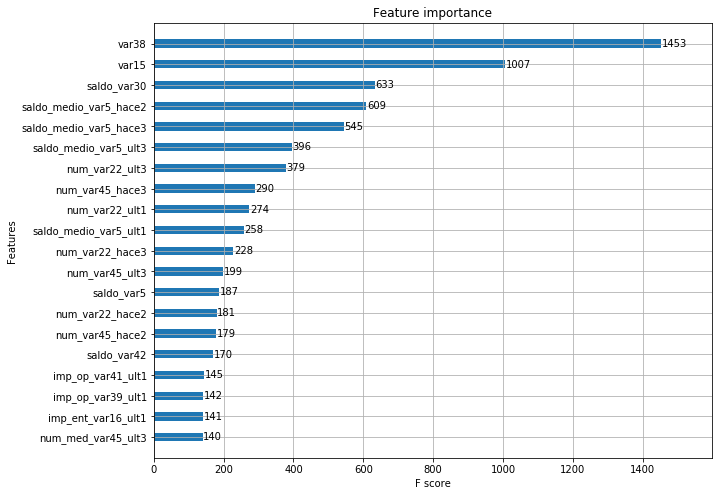

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.1453
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss:

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

[72]	valid_0's auc: 0.887483	valid_0's binary_logloss: 0.118281	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139654
[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824305	valid_0's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.828884	valid_0's binary_logloss: 0.150957	valid_1's auc: 0.822387	valid_1's binary_logloss: 0.159711
[3]	valid_0's auc: 0.838845	valid_0's binary_logloss: 0.147117	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.156068
[4]	valid_0's auc: 0.843406	valid_0's binary_logloss: 0.144114	valid_1's auc: 0.834917	valid_1's binary_logloss: 0.153141
[5]	valid_0's auc: 0.846391	valid_0's binary_logloss: 0.141629	valid_1's auc: 0.837871	valid_1's binary_logloss: 0.150804
[6]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.13957	valid_1's auc: 0.839548	valid_1's binary_logloss: 0.148876
[7]	valid_0's auc: 0.851133	valid_0's binary_logloss: 0.137847	valid_1's auc: 0.841812	valid_1's binary_logloss: 0.147225
[8]	valid_0's auc: 0.852859	valid_0's binary_logloss: 0.136394	valid_1's auc: 0.84238

In [14]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss